# Data exploration using Jupyter Notebook and Pandas

Quite often the first step in my workflow is to read in and get a sense of a data set.  This is straightforward to do in a Jupyter notebook.  Interactive notebooks allow me to quickly and iteratively explore the data while the ability to integrate markdown comments allow me to document what I am doing.  Notebooks care also portable, which means that I can easily share my process, visualizations, and thinking with colleagues.

Here I am exploring the UCI bikeshare data set, from downloading the data from the website through to creating visualizations of the data

## Download the data from the UCI archive

Automating the data download is an effective way to know exactly what data has been used, and where to find it if future questions arise.

In [7]:
import urllib.request
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
local_zipfilename =  "Bikeshare.zip"
filename = "hour.csv"

urllib.request.urlretrieve(url, local_zipfilename)

('Bikeshare.zip', <http.client.HTTPMessage at 0x20732c8e860>)

### Read data from the .zip file into a pandas dataframe

Pandas dataframes are my favorite data structure for quick analytics, especially in an exploratory way, because there are so many built in functions and because the display is beautiful.

In [67]:
import zipfile
import pandas as pd
from IPython.display import display

with zipfile.ZipFile(local_zipfilename) as z:
    with z.open(filename) as f:
        data = pd.read_csv(f, delimiter=",")
display(data.head())    # print the first 5 rows

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Describe provides a quick evaluation of data completeness, and basic univariate statistics.


In [68]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### A few items of data clean-up

1. Season, year, month, holiday, weekday, workingday, and weathersit should all be categorical variables.  
2. Instant appears to be an index variable
3. dteday is not a date format, and does not include the time of day

In [69]:
for variable in ["season", "yr", "mnth", "hr","holiday", "weekday", "workingday", "weathersit"]:
    data[variable] = data[variable].astype("category")

data.index = data["instant"] # reindex to the instant column - it starts at 1 while Pandas index starts at 0
data = data.drop("instant", axis = 1) # drop the column

data['full_date'] = pd.to_datetime(data['dteday'] + "-" + data["hr"].astype(str).apply(lambda x: str(x).zfill(2)), format='%Y-%m-%d-%H')  
data['dteday'] = pd.to_datetime(data['dteday'])

Check that the date conversion was successful

In [70]:
data[['full_date', "dteday", "hr"]].head()

,full_date,dteday,hr
instant,,,
1,2011-01-01 00:00:00,2011-01-01,0
2,2011-01-01 01:00:00,2011-01-01,1
3,2011-01-01 02:00:00,2011-01-01,2
4,2011-01-01 03:00:00,2011-01-01,3
5,2011-01-01 04:00:00,2011-01-01,4


Check that all the data types are correct

In [71]:
data.dtypes

dteday        datetime64[ns]
season              category
yr                  category
mnth                category
hr                  category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
full_date     datetime64[ns]
dtype: object

In [72]:
data.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Visualize the data

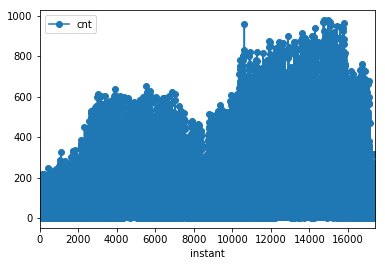

In [73]:
# Basic plots are available in the Pandas library
%matplotlib inline 

data[["full_date", "cnt"]].plot(marker = 'o')

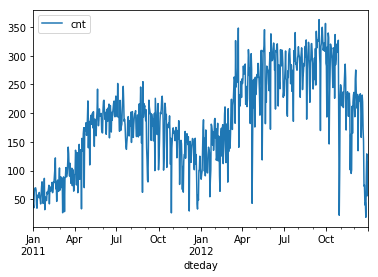

In [74]:
# There seems to be a lot of noise hour to hour; group data by day and take the average count
data[['dteday', 'cnt']].groupby("dteday").mean().plot()

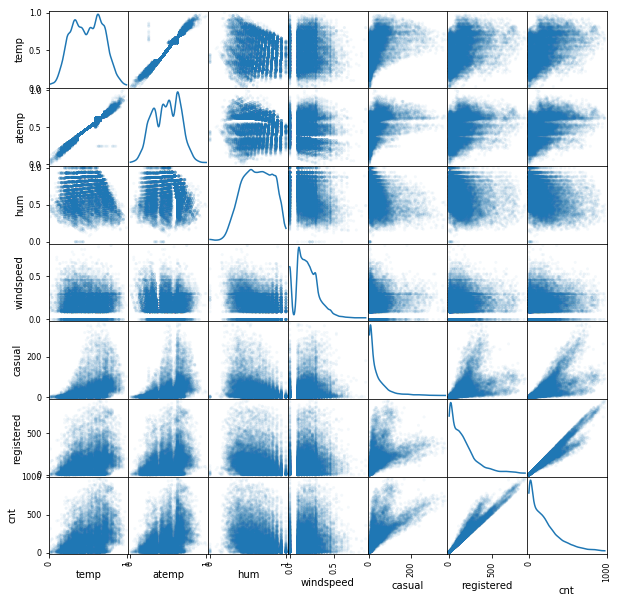

In [79]:
# To take a quick look at relationships between continuous variables, use scatter matrix
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

scatter_matrix(data, alpha=0.05, figsize=(10, 10), diagonal='kde')
plt.show()

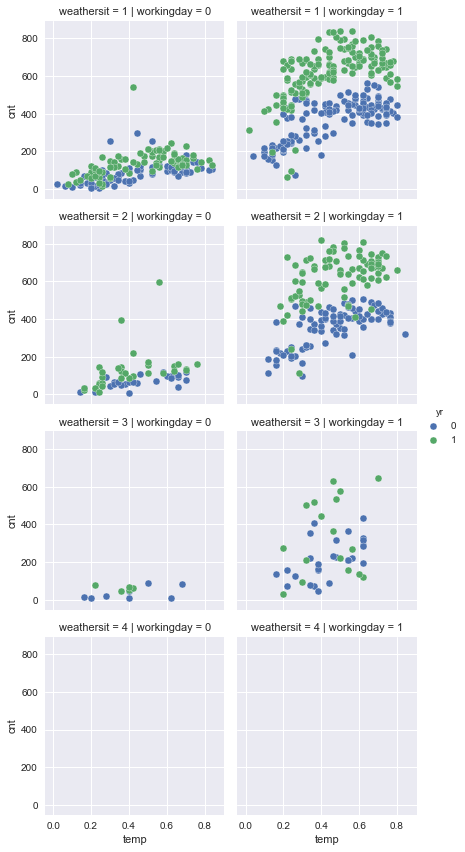

In [91]:
# Relationships between continuous and categorical variables can by seen using a facet grid
# Filter the data to use only the 8 o'clock data for simplicity

import seaborn as sns

f = sns.FacetGrid(data[data["hr"] == 8] , col="workingday",  row = "weathersit", hue = 'yr')
f = (f.map(plt.scatter, "temp", "cnt", edgecolor="w")
     .add_legend())

### Conclusions

This was a very quick demo, but even from these plots there are some clear conclusions and indications of directions for further investigation:

1. There is significant variation in the number of bikes rented based on the time of day

2. Most continuous variables show complex relationships (probably as a result of confounding categorical variables), but temp and atemp show a clear correlation, as do registered riders and overall count of rentals ("cnt")

3. After doing some facting of the data, it is clear that the bike share business has seen significant growth in the number of rentals on working days from the first year to the second, but that the holiday and weekend traffic has not significantly changed. 

4. Temperature affects the rates of rentals more strongly on working days than on holidays at 8am.

5. There are a few interesting outliers in the year 1 holiday rental numbers.

